In [1]:
import pandas as pd
stockdata=pd.read_csv('netflix.csv')
stockdata.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400
1,2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700
2,2023-03-15,292.510010,306.309998,292.279999,303.790009,303.790009,9215300
3,2023-03-16,304.750000,316.600006,301.709991,310.059998,310.059998,7903700
4,2023-03-17,310.059998,310.760010,300.000000,303.500000,303.500000,6918800


<AxesSubplot:>

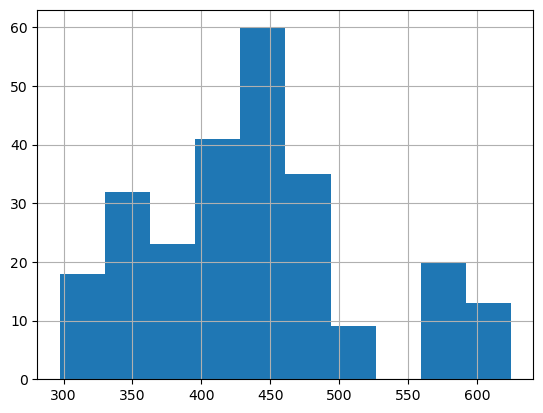

In [2]:
stockdata['High'].hist()

<AxesSubplot:>

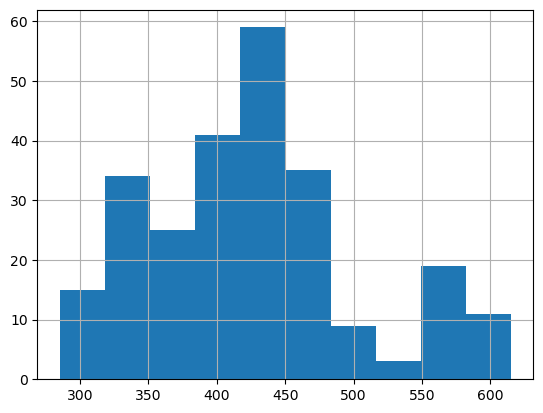

In [3]:
stockdata['Low'].hist()

<AxesSubplot:>

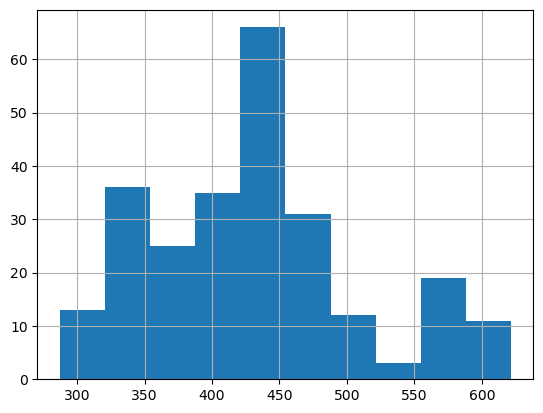

In [4]:
stockdata['Open'].hist()

<AxesSubplot:>

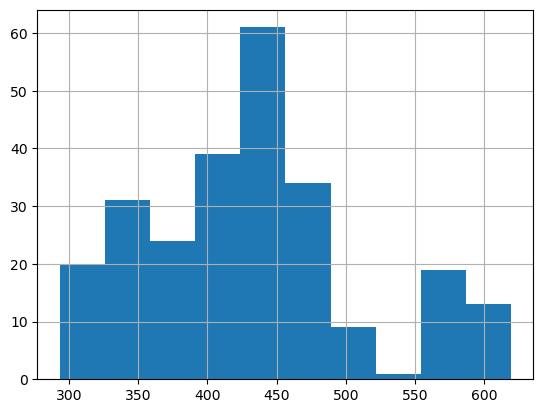

In [5]:
stockdata['Close'].hist()

In [6]:
!pip install scikit-learn==1.3.0

In [7]:
!pip install tensorflow

  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl (413 kB)
  Using cached grpcio-1.62.1-cp39-cp39-win_amd64.whl (3.8 MB)
  Using cached h5py-3.10.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached pygments-2.17.2-py3-none-any.whl (1.2 MB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


AttributeError: 'Figure' object has no attribute 'autofat_xdate'

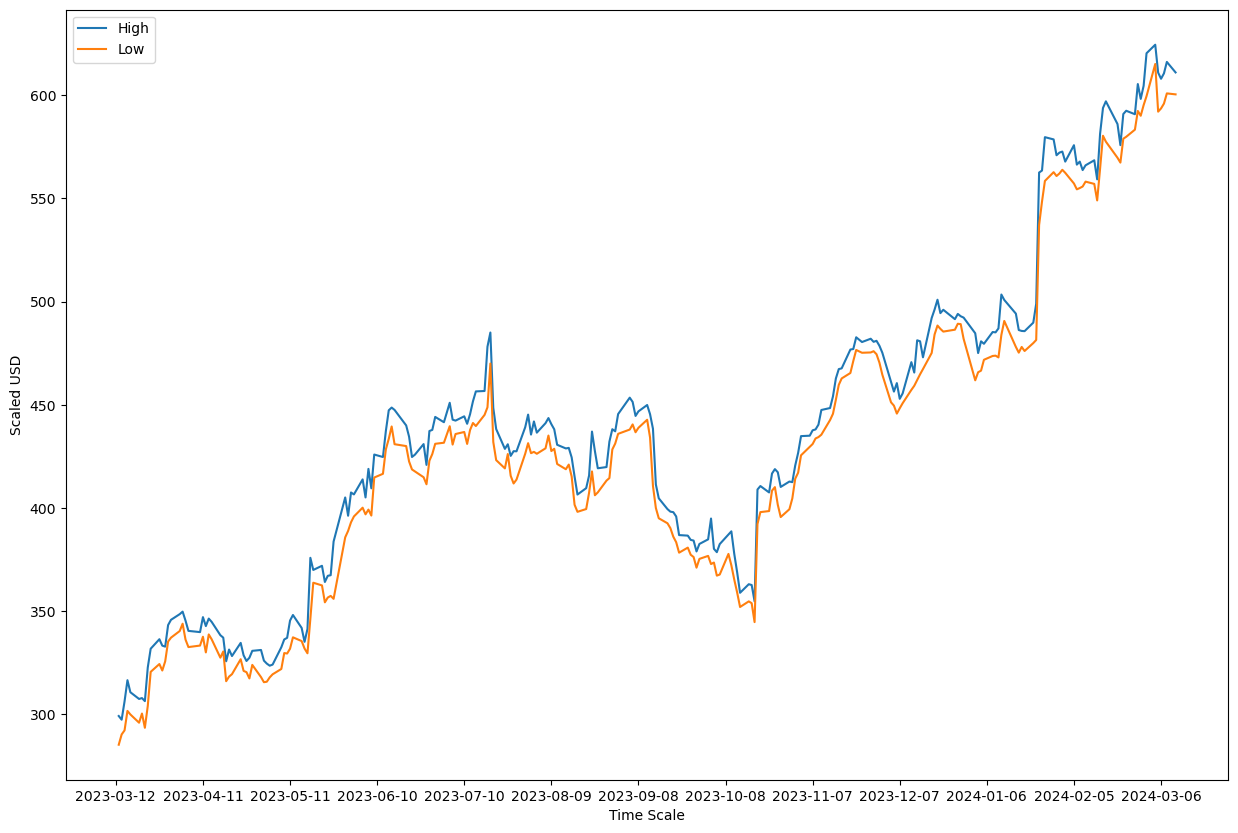

In [15]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator (interval=30))
x_dates=[dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stockdata.Date.values]
                                                         
plt.plot(x_dates, stockdata['High'], label='High')
plt.plot(x_dates, stockdata['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofat_xdate()
plt.show()

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [17]:
target_y=stockdata['Close']
X_feat=stockdata.iloc[:,0:3]

In [18]:
sc=StandardScaler()
X_ft=sc.fit_transform(X_feat.values)
X_ft=pd.DataFrame(columns=X_feat.columns,
                 data=X_ft,
                 index=X_feat.index)

ValueError: could not convert string to float: '2023-03-13'

In [19]:
def lstm_split(data,steps):
    X,y=[],[]
    for i in range(len(data)-steps+1):
        X.append(data[i:i+steps,:-1])
        y.append(data[i+steps-1,-1])
    return np.array(X),np.array(y)

In [26]:
X1, y1= lstm_split(stockdata.values,steps=2)

train_split=0.8
split_idx= int(np.ceil(len(X1)*train_split))
date_index = stockdata.index

X_train, x_test = X1[:split_idx], X1[split_idx:]
y_train, y_test=y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]
print(X1.shape, X_train.shape, x_test.shape, y_test.shape)


(250, 2, 6) (200, 2, 6) (50, 2, 6) (50,)


In [28]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()



C:\Users\Admin\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 2, 32)               │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2, 1)                │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,025 (19.63 KB)

 Trainable params: 5,025 (19.63 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history=lstm.fit(X_train,y_train,
                epochs=100,batch_size=4,
                verbose=2,shuffle=False)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).